In [88]:
import numpy as np


In [89]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [90]:
def true_func(x: float) -> float:
    return np.cos(1.5 * np.pi * x)

In [91]:
degrees = [1, 2, 3, 4, 15, 20, 30]

x = np.arange(start=-0.75, stop=0.75, step=0.02)
y_true = true_func(x)
y = y_true + np.random.normal(loc=0.0, scale=2.0, size=len(x)) * 0.1

x = np.reshape(x, (-1, 1))

In [92]:
print(x)
print(y)

[[-0.75]
 [-0.73]
 [-0.71]
 [-0.69]
 [-0.67]
 [-0.65]
 [-0.63]
 [-0.61]
 [-0.59]
 [-0.57]
 [-0.55]
 [-0.53]
 [-0.51]
 [-0.49]
 [-0.47]
 [-0.45]
 [-0.43]
 [-0.41]
 [-0.39]
 [-0.37]
 [-0.35]
 [-0.33]
 [-0.31]
 [-0.29]
 [-0.27]
 [-0.25]
 [-0.23]
 [-0.21]
 [-0.19]
 [-0.17]
 [-0.15]
 [-0.13]
 [-0.11]
 [-0.09]
 [-0.07]
 [-0.05]
 [-0.03]
 [-0.01]
 [ 0.01]
 [ 0.03]
 [ 0.05]
 [ 0.07]
 [ 0.09]
 [ 0.11]
 [ 0.13]
 [ 0.15]
 [ 0.17]
 [ 0.19]
 [ 0.21]
 [ 0.23]
 [ 0.25]
 [ 0.27]
 [ 0.29]
 [ 0.31]
 [ 0.33]
 [ 0.35]
 [ 0.37]
 [ 0.39]
 [ 0.41]
 [ 0.43]
 [ 0.45]
 [ 0.47]
 [ 0.49]
 [ 0.51]
 [ 0.53]
 [ 0.55]
 [ 0.57]
 [ 0.59]
 [ 0.61]
 [ 0.63]
 [ 0.65]
 [ 0.67]
 [ 0.69]
 [ 0.71]
 [ 0.73]]
[-0.70608941 -0.94293701 -1.19477177 -1.1370217  -0.86395708 -1.14299066
 -0.94181761 -0.95544305 -1.0657641  -0.46923876 -0.72585636 -1.20471318
 -0.70234023 -0.80536981 -0.42993356 -0.68100271 -0.46288646 -0.25247739
 -0.09072201 -0.41198838 -0.14535934 -0.07928174 -0.02093154  0.55587814
  0.37503667  0.13050664  0.6515

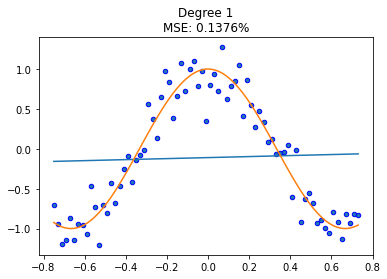

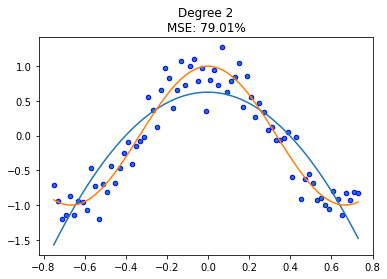

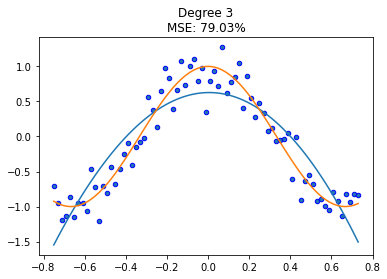

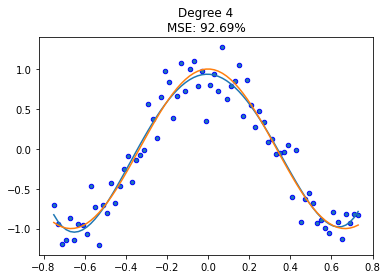

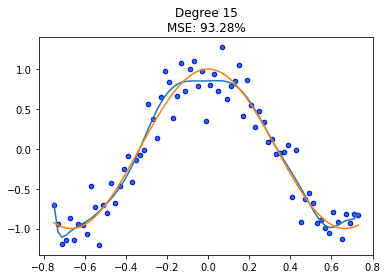

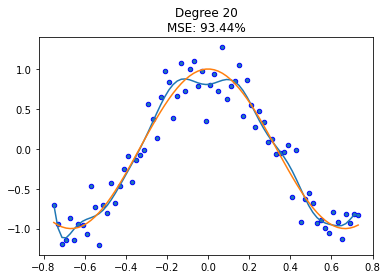

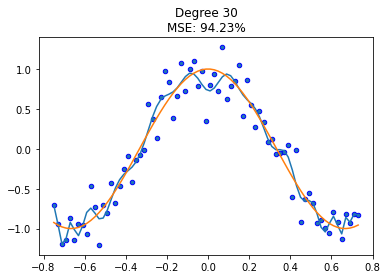

In [93]:
for i, deg in enumerate(degrees):
    fig, ax = plt.subplots()

    p_features = PolynomialFeatures(deg)
    regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", p_features),
        ("linear_regression", regression)
    ])
    pipeline.fit(x, y)
    score = pipeline.score(x, y)
    y_pred = pipeline.predict(x)

    plt.plot(x, y_pred, label="Model")
    plt.plot(x, y_true, label="Actual Function")
    plt.scatter(x, y, edgecolor="b", s=20, label="Samples")
    plt.title(f"Degree {deg}\nMSE: {score*100:.4}%")
    plt.show()